# Data Gathering
The below code show a pythonic way to pull the [Spotify data set from Kaggle](https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=tracks.csv).

In [1]:
import pandas as pd
import numpy as np
import os
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_gbq

## Get data set from Kaggle

In [2]:
kaggle.api.authenticate()

In [3]:
kaggle.api.dataset_download_files('lehaknarnauli/spotify-datasets', 'spotify_data', unzip=True)

## Set up directories

In [4]:
ROOT = os.getcwd()
print(f"Root Directory: {ROOT}")

TRACKS_DIR = os.path.join(ROOT, 'spotify_data')
print(f"Spotify Tracks Directory: {TRACKS_DIR}")

Root Directory: C:\Users\Nicholas\Desktop\Masters - Classes\MSDS434\MSDS434-Final_P2
Spotify Tracks Directory: C:\Users\Nicholas\Desktop\Masters - Classes\MSDS434\MSDS434-Final_P2\spotify_data


## Read in data into Pandas data frame

In [13]:
tracks_df = pd.read_csv(os.path.join(TRACKS_DIR, 'tracks.csv'))
print(len(tracks_df))
tracks_df.head()

586672


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## EDA

In [6]:
tracks_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [7]:
# Check for Nulls
pd.isnull(tracks_df).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [8]:
# Check for Bops
most_popular = tracks_df.query('popularity > 75', inplace = False).sort_values('popularity', ascending = False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
93807,4cG7HUWYHBV6R6tHn1gxrl,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,169153,0,"['Riton', 'Nightcrawlers', 'Mufasa & Hypeman',...","['7i9j813KFoSBMldGqlh2Z1', '1gALaWbNDnwS2ECV09...",2021-01-15,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.801,122.980,4
92819,1xK1Gg9SxG8fy2Ya373oqb,Bandido,94,232853,0,"['Myke Towers', 'Juhn']","['7iK8PXO48WeuP03g8YR51W', '2LmcxBak1alK1bf7d1...",2020-12-10,0.713,0.617,8,-4.637,1,0.0887,0.12200,0.000000,0.0962,0.682,168.021,4


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'duration_ms'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature')]

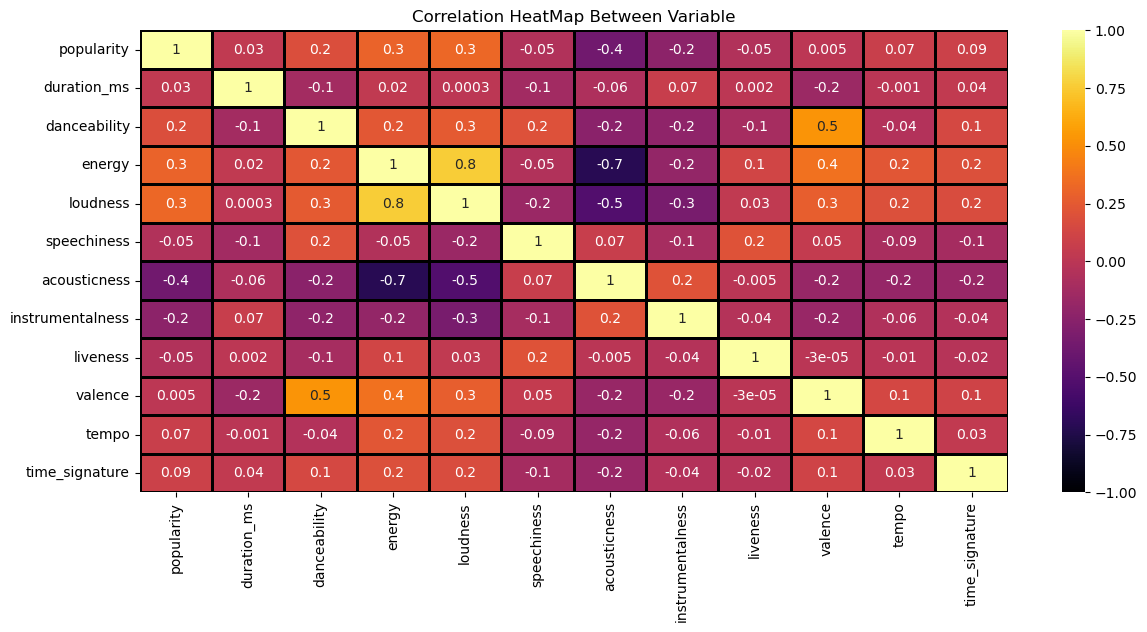

In [9]:
corr_df = tracks_df.drop(["key", "mode", "explicit"], axis = 1).corr(method = "pearson")
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidths = 1, linecolor = "Black")
heatmap.set_title("Correlation HeatMap Between Variable")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)

### Observations
1. High correlation with danceability, energy and loudness when it comes down to popularity
2. High negative correlation with acousticness and popularity

## Clean data

In [14]:
# Drop Nans in 'name' column
tracks_df = tracks_df.dropna(subset=['name'])
pd.isnull(tracks_df).sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

## Create sample form data
Since the data is too large for our purpose, I will take a random sample of 100,000 tracks

In [15]:
track_df_sample = tracks_df.sample(100000, replace=True)
print(len(track_df_sample))
track_df_sample.head()

100000


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
304440,7rlnBzX3vVYi5Gtjfp4UQJ,Lost All My Tears (Mix Cut) - Original Mix,3,56573,0,['Neptune Project'],['3G0VlbwfjmeZO33pyp09IY'],2014-12-19,0.399,0.998,9,-6.430,1,0.0486,0.000005,0.907000,0.4180,0.825,135.647,4
272966,3Rhdv8sG6C2OlvX68K8Mp0,只怕不再遇上 - Live,15,241733,0,['Leslie Cheung'],['2g0QLUYku8AuPVK2udRV7i'],1997-06-28,0.384,0.225,8,-15.432,1,0.0323,0.799000,0.000015,0.9410,0.131,66.436,4
550870,1mEclq6tMRuHa2pXBbSrdh,BIG BEAT,30,252400,0,['Eikichi Yazawa'],['6r4KqrquvtAy0fcJUU2VGB'],1991-07-05,0.595,0.708,10,-11.846,0,0.0500,0.003050,0.000014,0.0529,0.827,126.703,4
438820,0NRP5OIrTcgGvttJlSLO0n,Até o céu,61,166829,0,"['Anitta', 'MC Cabelinho']","['7FNnA9vBm6EKceENgCGRMb', '1WQBwwssN6r8DSjUlk...",2019-12-20,0.628,0.874,1,-1.818,0,0.0613,0.391000,0.000000,0.3370,0.691,81.967,4
315315,0185OsYNsynw4Z9bxgBB2G,"Jólin, jólin",6,145357,0,['Svanhildur Jakobsdóttir'],['5KDiGaXlk6lxzpXoynx6e4'],1972-01-01,0.465,0.277,0,-14.801,1,0.0886,0.748000,0.000000,0.4720,0.717,81.574,4


## Spit data in a random train and test set

In [16]:
msk = np.random.rand(len(track_df_sample)) < 0.8

train_df = track_df_sample[msk]
test_df = track_df_sample[~msk]

print(f"Train set: {len(train_df)}")
print(f"Test set: {len(test_df)}")

Train set: 79991
Test set: 20009


## Load data into BigQuery

In [17]:
# train set
pandas_gbq.to_gbq(train_df, 'spotify_track_data.track_train', project_id='msds434-nd-final')

1it [00:18, 18.50s/it]


In [18]:
# test set
pandas_gbq.to_gbq(test_df, 'spotify_track_data.track_test', project_id='msds434-nd-final')

1it [00:06,  7.00s/it]
